In [40]:
# importing required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [41]:
def heading(info):
    print("\n\n##### {} #####".format(info))

In [42]:
# read the dataset
dataSet = pd.read_csv('Banglore_traffic_Dataset.csv', encoding = 'unicode_escape')

In [43]:
# print info about the data
dataSet.info()
heading("Sample data points from the dataset")
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [44]:
# lets find the individual column statistics
heading("Stats about non-numeric values")
print(dataSet.describe(include = "object"))

heading("Stats about numeric values")
print(dataSet.describe(include = "number"))



##### Stats about non-numeric values #####
              Date    Area Name Road/Intersection Name Weather Conditions  \
count         8936         8936                   8936               8936   
unique         952            8                     16                  5   
top     2023-01-24  Indiranagar          100 Feet Road              Clear   
freq            15         1720                    860               5426   

       Roadwork and Construction Activity  
count                                8936  
unique                                  2  
top                                    No  
freq                                 8054  


##### Stats about numeric values #####
       Traffic Volume  Average Speed  Travel Time Index  Congestion Level  \
count     8936.000000    8936.000000        8936.000000       8936.000000   
mean     29236.048120      39.447427           1.375554         80.818041   
std      13001.808801      10.707244           0.165319         23.533182   




##### Target variable "Traffic volume" distribution #####


<Axes: xlabel='Traffic Volume', ylabel='Count'>

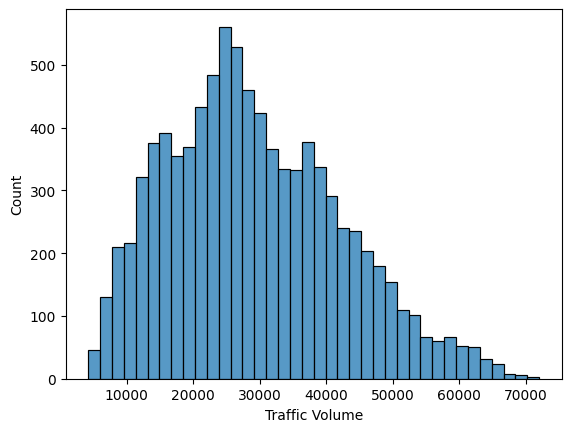

In [45]:
# lets first verify how to target variable is distributed
heading("Target variable \"Traffic volume\" distribution")
sns.histplot(data = dataSet, x = "Traffic Volume")

In [46]:
# lets convert the categorical values to numeric
def convert_categorical_to_numeric(dataframe, categorical_cols):
    
    for col in categorical_cols:
        if col in dataframe.columns:
            # create a mapping for the unique values in the column
            unique_values = dataframe[col].unique()
            value_mapping = {label: idx for idx, label in enumerate(unique_values)}
            
            # apply the mapping to convert to numeric
            dataframe[col] = [value_mapping[val] for val in dataframe[col]]
    
    return dataframe

# leaving date column as of now and converting other columns

# we will backup the original dataset 
originalDataset = dataSet.copy()

# select the relevant columns and convert them
columnsToConvert = ["Roadwork and Construction Activity","Weather Conditions","Area Name","Road/Intersection Name"]
dataSet = convert_categorical_to_numeric(dataSet, columnsToConvert)

heading("After conversion to numeric values")
print(dataSet[columnsToConvert].head())



##### After conversion to numeric values #####
   Roadwork and Construction Activity  Weather Conditions  Area Name  \
0                                   0                   0          0   
1                                   0                   0          0   
2                                   0                   0          1   
3                                   0                   0          2   
4                                   0                   0          2   

   Road/Intersection Name  
0                       0  
1                       1  
2                       2  
3                       3  
4                       4  


In [47]:
# drop unrequired columns based on corelation matrix
dropThem = ["Public Transport Usage", "Traffic Signal Compliance", "Parking Usage", "Roadwork and Construction Activity","Weather Conditions", "Date"]
dataSet = dataSet.drop(columns=dropThem)

heading("Final dataset columns")
print(dataSet.head())



##### Final dataset columns #####
   Area Name  Road/Intersection Name  Traffic Volume  Average Speed  \
0          0                       0           50590      50.230299   
1          0                       1           30825      29.377125   
2          1                       2            7399      54.474398   
3          2                       3           60874      43.817610   
4          2                       4           57292      41.116763   

   Travel Time Index  Congestion Level  Road Capacity Utilization  \
0           1.500000        100.000000                 100.000000   
1           1.500000        100.000000                 100.000000   
2           1.039069         28.347994                  36.396525   
3           1.500000        100.000000                 100.000000   
4           1.500000        100.000000                 100.000000   

   Incident Reports  Environmental Impact  Pedestrian and Cyclist Count  
0                 0               151.180       

In [48]:
# seperate the input and target columns into numpy arrays
if isinstance(dataSet, pd.DataFrame):
    dataSet = dataSet.to_numpy()
# print(dataset)
X = dataSet[:, [0, 1, 3, 4,5,6,7,8,9]]
Y = dataSet[:, 2] 

# adding extra column for intercepts
X = np.hstack((np.ones((X.shape[0], 1)), X))
heading("Printing X and Y variables for the model")
print(X[:5])
print(Y[:5])




##### Printing X and Y variables for the model #####
[[  1.           0.           0.          50.23029856   1.5
  100.         100.           0.         151.18       111.        ]
 [  1.           0.           1.          29.37712471   1.5
  100.         100.           1.         111.65       100.        ]
 [  1.           1.           2.          54.47439821   1.03906885
   28.34799386  36.39652494   0.          64.798      189.        ]
 [  1.           2.           3.          43.81761039   1.5
  100.         100.           1.         171.748      111.        ]
 [  1.           2.           4.          41.11676289   1.5
  100.         100.           3.         164.584      104.        ]]
[50590. 30825.  7399. 60874. 57292.]


In [49]:
# shuffle the datasets
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
# 
X_shuffled = X[indices]
Y_shuffled = Y[indices]

# split the dataset into 80:20
split_ratio = 0.1
split_index = int(len(X_shuffled) * split_ratio)

X_train = X_shuffled[:split_index]
Y_train = Y_shuffled[:split_index]

X_test = X_shuffled[split_index:]
Y_test = Y_shuffled[split_index:]

print("Training set samples: ", X_train.shape[0])
print("Testing set samples: ", X_test.shape[0])

Training set samples:  893
Testing set samples:  8043


In [50]:
# we solve the least squares problem using the normal equation
# (X^T * X)^(-1) * (X^T * y)
weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
heading("Training on linear regression with given dataset, ideal weights of the model are")
print(weights[:5])



##### Training on linear regression with given dataset, ideal weights of the model are #####
[-2.50000000e+04 -1.27791111e-09  3.37418982e-10 -2.31636932e-11
 -9.43504119e-09]


In [51]:
# lets predict values
Y_pred = X_test @ weights

# we will use mean absolute percentage error to calculate the error percentage and judge the model
MAPE = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

MSE = np.mean(np.square(Y_test - Y_pred))

heading("Printing the MAPE and first 10 predictions with actual values")
print("MAPE: {} %".format(MAPE))
print("MSE: {}".format(MSE))
for i in range(10):
    print("\nPredicted value: {0} \t Actual value: {1}".format(Y_pred[i], Y_test[i]))



##### Printing the MAPE and first 10 predictions with actual values #####
MAPE: 7.289863639515606e-12 %
MSE: 3.908224522214421e-18

Predicted value: 27400.999999999498 	 Actual value: 27401.0

Predicted value: 23973.000000001237 	 Actual value: 23973.0

Predicted value: 13324.00000000374 	 Actual value: 13324.0

Predicted value: 43597.99999999926 	 Actual value: 43598.0

Predicted value: 26879.999999998596 	 Actual value: 26880.0

Predicted value: 22352.999999997788 	 Actual value: 22353.0

Predicted value: 42594.999999998414 	 Actual value: 42595.0

Predicted value: 44244.000000000386 	 Actual value: 44244.0

Predicted value: 37915.999999999534 	 Actual value: 37916.0

Predicted value: 33275.00000000052 	 Actual value: 33275.0
